## ISM機能階層分析

#### ライブラリのインポート

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

#### 機能項目相互間の関係のマトリックス宣言

In [6]:
start_column = 7    # マトリックスの開始列（G列）
start_row = 5       # マトリックスの開始行（5行）
num = 19            # 読み取るセルの範囲（num 行の正方形を読み取る）

In [7]:
# 階層構造を定義した2次元マトリックスを取得する関数
def read_data(start_row, start_column, num):
    df = pd.read_excel("機能項目相互間の関係.xlsx", header=None, sheet_name="機能項目相互間の関係", 
                       skiprows=start_row - 1, nrows=num, usecols=range(start_column - 1, start_column - 1 + num))
    
    data = np.where(df.values == "○", 1, 0)

    return data

# データを読み取る
matrix = read_data(start_row, start_column, num)
matrix

# matrix = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
#                     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
#                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ],
#                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
#                     [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
#                     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
#                     [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ],
#                     [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ],
#                     [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
#                     [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
# matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0,

#### 各種関数の定義

In [8]:
# ISM機能階層分析を行う関数
def ism_FHA(matrix):

    ###----------可達行列作成処理----------###
    # 行列のサイズを取得
    n = len(matrix)

    print('\n----------隣接行列----------')
    matrix = matrix.astype(bool)
    I = np.eye(n).astype(bool)
    adj_matrix = np.logical_or(matrix, I)
    print(adj_matrix.astype(int))

    print('\n----------可達行列----------')
    reachability_matrix = adj_matrix.copy()
    while not np.array_equal(reachability_matrix, reachability_matrix @ adj_matrix):
        reachability_matrix = reachability_matrix @ adj_matrix  #@演算子を利用することで行列積を求める（bool演算）
    print(reachability_matrix.astype(int))

    return reachability_matrix

# 指定した行と列を削除する関数
def remove_rows_and_columns(matrix, rows_to_remove):
    matrix = np.delete(matrix, rows_to_remove, axis=0)
    matrix = np.delete(matrix, rows_to_remove, axis=1)
    return matrix

# Trueが1つだけ含まれている行を探す関数
def find_single_true_row(matrix):
    single_true_rows = []
    for i in range(len(matrix)):
        if np.sum(matrix[i]) == 1:
            single_true_rows.append(i)
    return single_true_rows

# Trueが2つ含まれている場合

In [9]:
# ノードの配置を取得する関数
def get_layer_positions(removed_rows_dict, custom_pos={}):
    positions = {}
    current_x = 0
    for layer, nodes in removed_rows_dict.items():
        for node in nodes:
            positions[node] = (current_x, -layer)
            current_x += 1
        current_x = 0

    # custom_posで指定したノード番号のx座標を辞書リストに追加する
    for node, x_coord in custom_pos.items():
        positions[node] = (x_coord, positions[node][1])

    return positions

# グラフオブジェクトを作成する関数
def create_graph(removed_rows_dict):
    G = nx.DiGraph()

    # ノードをグラフに追加
    for i in range(matrix.shape[0]):
        G.add_node(i)

    # matrixを参照しエッジを追加する関数
    def add_edges(source_node, target_nodes, target_layer_dict):
        sorted_target_nodes = sorted(target_nodes, key=lambda node: target_layer_dict[node], reverse=True)
        for target_node in sorted_target_nodes:
            if source_node != target_node and not nx.has_path(G, source_node, target_node) and not nx.has_path(G, target_node, source_node):
                G.add_edge(source_node, target_node)
                print('Edge added:', source_node, '->' , target_node)

    sorted_removed_rows_dict = dict(sorted(removed_rows_dict.items()))  # 階層を昇順にソート

    # target_nodeが属する階層の情報を辞書リストとして取得
    target_layer_dict = {}
    for layer, nodes in removed_rows_dict.items():
        for node in nodes:
            target_layer_dict[node] = layer
    
    print('\n--------エッジ追加処理--------')
    for layer, nodes in sorted_removed_rows_dict.items():
        target_nodes = []
        for node in nodes:
            target_nodes = matrix[node].nonzero()[0]
            add_edges(node, target_nodes, target_layer_dict)
    
    return G

#### ISM機能階層分析 と 階層グラフの作成

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [12]:
# 可達行列導出
reachability_matrix = ism_FHA(matrix)

linked = linkage(reachability_matrix, 'ward')


----------隣接行列----------
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1]
 [1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1]
 [0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

----------可達行列----------
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1]
 [1 

In [13]:
reachability_matrix.astype(int)
row = len(reachability_matrix)
print(row)

19


In [14]:
row_sums = np.sum(reachability_matrix, axis=1)
# 各行の和を表示
for i, row_sum in enumerate(row_sums):
    print(f"行 {i + 1} の和: {row_sum}")

row_sums

行 1 の和: 3
行 2 の和: 5
行 3 の和: 7
行 4 の和: 9
行 5 の和: 10
行 6 の和: 6
行 7 の和: 19
行 8 の和: 7
行 9 の和: 16
行 10 の和: 4
行 11 の和: 2
行 12 の和: 10
行 13 の和: 2
行 14 の和: 1
行 15 の和: 3
行 16 の和: 2
行 17 の和: 8
行 18 の和: 1
行 19 の和: 1


array([ 3,  5,  7,  9, 10,  6, 19,  7, 16,  4,  2, 10,  2,  1,  3,  2,  8,
        1,  1])

In [15]:
# 各列の和を計算
column_sums = np.sum(reachability_matrix, axis=0)

# 各列の和を表示
for j, column_sum in enumerate(column_sums):
    print(f"列 {j + 1} の和: {column_sum}")

列 1 の和: 12
列 2 の和: 9
列 3 の和: 7
列 4 の和: 3
列 5 の和: 3
列 6 の和: 8
列 7 の和: 1
列 8 の和: 2
列 9 の和: 2
列 10 の和: 11
列 11 の和: 3
列 12 の和: 3
列 13 の和: 2
列 14 の和: 6
列 15 の和: 5
列 16 の和: 7
列 17 の和: 4
列 18 の和: 15
列 19 の和: 13


In [16]:
# 関連度
d_add_r = row_sums + column_sums
d_add_r

array([15, 14, 14, 12, 13, 14, 20,  9, 18, 15,  5, 13,  4,  7,  8,  9, 12,
       16, 14])

In [17]:
d_subtract_r = row_sums - column_sums
d_subtract_r

array([ -9,  -4,   0,   6,   7,  -2,  18,   5,  14,  -7,  -1,   7,   0,
        -5,  -2,  -5,   4, -14, -12])

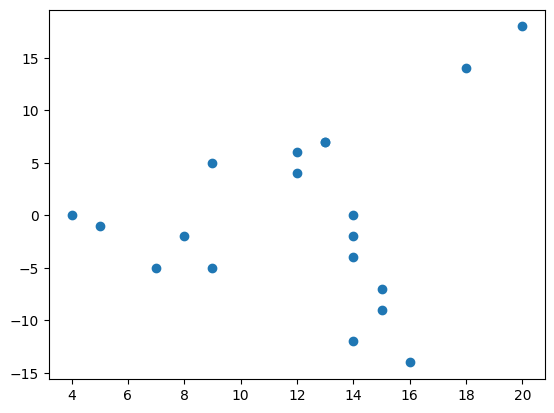

In [18]:
plt.scatter(d_add_r, d_subtract_r)

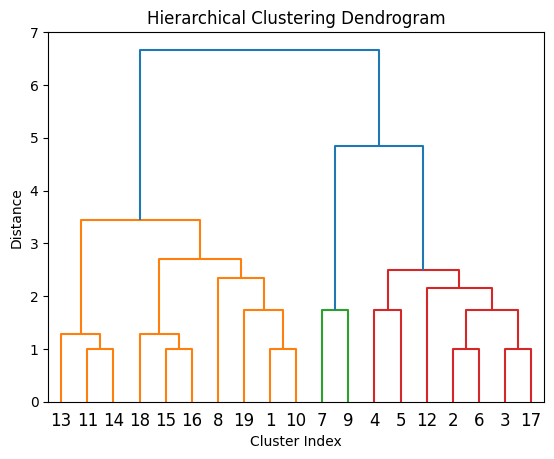

In [19]:
# 可達行列から樹形図
dendrogram(linked, orientation='top', labels=range(1, len(reachability_matrix) + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

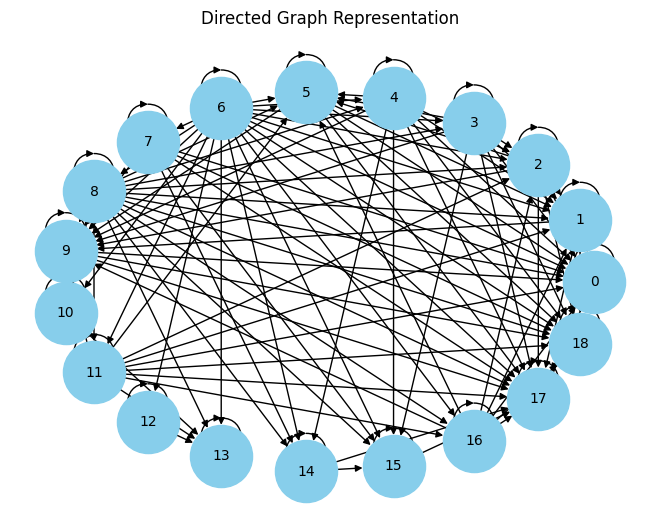

In [20]:
# 可達行列から有向グラフ
G = nx.DiGraph(reachability_matrix)

pos = nx.circular_layout(G)  # ノードの配置方法を設定
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black')
plt.title('Directed Graph Representation')
plt.show()

c:\WorkSpace\ISM\ISM\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM\ISM\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM\ISM\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM\ISM\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM\ISM\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


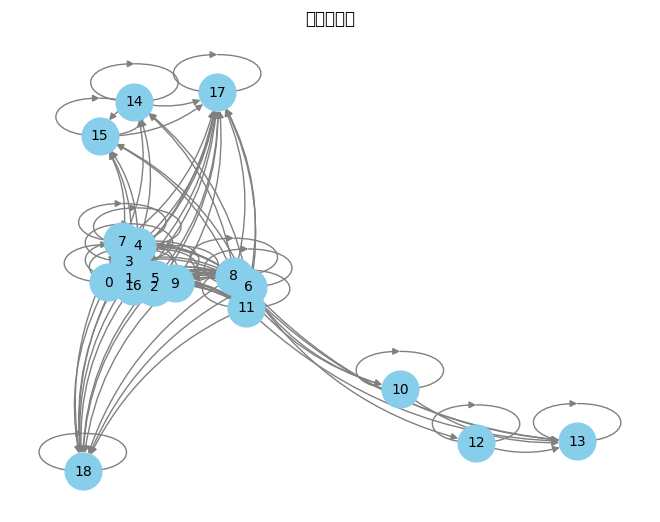

In [21]:


# グラフオブジェクトを作成
G = nx.DiGraph()

# 可達行列の行数（および列数）を取得
num_nodes = len(reachability_matrix)

# ノードをグラフに追加
for node_id in range(num_nodes):
    G.add_node(node_id)

# エッジをグラフに追加
for i in range(num_nodes):
    for j in range(num_nodes):
        if reachability_matrix[i][j] == 1:
            G.add_edge(i, j)

# グラフを描画
pos = nx.spring_layout(G)  # グラフを描画するためのレイアウトを計算
# nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', edge_color='gray', connectionstyle="arc3,rad=0.2")
plt.title("有向グラフ")
plt.show()

In [22]:
# ISM機能階層分析を実行
removed_rows_dict = ism_FHA(matrix) # 肩つ行列までは求まるがエッジ作成ができない


----------隣接行列----------
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1]
 [1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1]
 [0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

----------可達行列----------
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1]
 [1 

In [23]:
# グラフを作成
G = create_graph(removed_rows_dict)

# ノードの配置を取得
pos = get_layer_positions(removed_rows_dict)

# グラフを描画して表示
plt.figure(figsize=(8, 8), dpi=600)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=15)
plt.savefig('fig\ISM-FHA_exercise.png', format='png')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'items'

ノードの位置を調節  
- エッジが重なって表示されているところがあるため  
- 見やすくなるようにするため  

In [ ]:
# custom_posでノード番号に対応するx座標を指定する
custom_pos = {3 : 1, 
              4 : 2,
              11: -1,
              16: 0}

# ノードの配置を取得
pos_fix = get_layer_positions(removed_rows_dict, custom_pos)

# グラフを描画して表示
plt.figure(figsize=(12, 10), dpi=600)
nx.draw(G, pos_fix, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=15)
plt.savefig('fig\ISM-FHA_exercise_fix.png', format='png')
plt.show()

: 